In [1]:
""" Load some libs """
""" python 2 lib using networkx """
import matplotlib.pyplot as plt
import networkx as nx
import random
import math
import pandas as pd
import statsmodels.api as sm
import glob
import os
import numpy as np
from PIL import Image
from helpers import *
import pickle
import time
#random.seed(100)
#tic = time.time()

/home/lucaskruitwagen/miniconda3/envs/py2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
""" load country centroids """
df_centroids = pd.read_csv('country_centroids.csv', encoding='utf-8').set_index('country')
print df_centroids
#print df_centroids.get_value('TH','latitude')

df_iso2 = pd.read_csv('all_portions.csv', encoding='utf-8').set_index('iso2')
#print df_centroids.get_value('TH','latitude')
df_iso2 = df_iso2.drop(['AX','BL'])
print df_iso2[df_iso2['2017_all'].isnull()]
df_iso2 = df_iso2.drop(df_iso2[df_iso2['2017_all'].isnull()].index.values)

          latitude   longitude                              name
country                                                         
AD       42.546245    1.601554                           Andorra
AE       23.424076   53.847818              United Arab Emirates
AF       33.939110   67.709953                       Afghanistan
AG       17.060816  -61.796428               Antigua and Barbuda
AI       18.220554  -63.068615                          Anguilla
AL       41.153332   20.168331                           Albania
AM       40.069099   45.038189                           Armenia
AN       12.226079  -69.060087              Netherlands Antilles
AO      -11.202692   17.873887                            Angola
AQ      -75.250973   -0.071389                        Antarctica
AR      -38.416097  -63.616672                         Argentina
AS      -14.270972 -170.132217                    American Samoa
AT       47.516231   14.550072                           Austria
AU      -25.274398  133.7

In [3]:
print list(df_iso2)
print df_iso2

[u'Unnamed: 0', u'country', u'iso3', u'iso_num', u'region', u'region_IEA', u'region_IEA_secondary', u'region_IEA_final', u'SIPS_REGION', u'urban_pop', u'rural_pop', u'population', u'portion', u'2007_all', u'2007_g', u'2007_b', u'2007_portion', u'2008_all', u'2008_g', u'2008_b', u'2008_portion', u'2009_all', u'2009_g', u'2009_b', u'2009_portion', u'2010_all', u'2010_g', u'2010_b', u'2010_portion', u'2011_all', u'2011_g', u'2011_b', u'2011_portion', u'2012_all', u'2012_g', u'2012_b', u'2012_portion', u'2013_all', u'2013_g', u'2013_b', u'2013_portion', u'2014_all', u'2014_g', u'2014_b', u'2014_portion', u'2015_all', u'2015_g', u'2015_b', u'2015_portion', u'2016_all', u'2016_g', u'2016_b', u'2016_portion', u'2017_all', u'2017_g', u'2017_b', u'2017_portion']
      Unnamed: 0                          country iso3  iso_num       region  \
iso2                                                                           
AF             0                      Afghanistan  AFG      4.0         ASIA

In [4]:
""" load in geographies """
df_neighbours = pd.read_csv('attribute_w_neighbours.csv',encoding='utf-8').set_index('iso_join_ISO_A2_EH')
print df_neighbours
df_neighbours = df_neighbours[df_neighbours.index.notnull()]
print len(df_neighbours), len(df_iso2)
drop_ind =  [ii for ii in df_neighbours.index.values if ii not in df_iso2.index.values]
print drop_ind
df_neighbours = df_neighours.drop(drop_ind)

                    scalerank           featurecla  LABELRANK  \
iso_join_ISO_A2_EH                                              
AF                          0  Admin-0 sovereignty        3.0   
AO                          0  Admin-0 sovereignty        3.0   
AL                          0  Admin-0 sovereignty        6.0   
AD                          0  Admin-0 sovereignty        6.0   
AE                          0  Admin-0 sovereignty        4.0   
AR                          0  Admin-0 sovereignty        2.0   
AM                          0  Admin-0 sovereignty        6.0   
AQ                          0  Admin-0 sovereignty        4.0   
AG                          3  Admin-0 sovereignty        6.0   
AU                          0  Admin-0 sovereignty        2.0   
AT                          0  Admin-0 sovereignty        4.0   
AZ                          0  Admin-0 sovereignty        5.0   
BI                          0  Admin-0 sovereignty        6.0   
BE                       

NameError: name 'df_neighours' is not defined

In [5]:
""" generate some country nodes"""
nodes_list = []

for iso2 in df_iso2.index.values:
    if not iso2 in df_centroids.index.values:
        print iso2


for iso2 in df_iso2.index.values:
    print iso2
    g = int(df_iso2.get_value(iso2,'2017_g')/df_iso2.get_value(iso2,'2017_all')*255)
    b = int(df_iso2.get_value(iso2,'2017_b')/df_iso2.get_value(iso2,'2017_all')*255)
    size=np.log10(df_iso2.get_value(iso2,'2017_all'))*3
    
    print size
    

    nodes_list.append(
        (iso2,{
            'type': 'country',
            'region': df_iso2.get_value(iso2,'SIPS_REGION'),
            'pos':np.array([df_centroids.get_value(iso2,'longitude'),df_centroids.get_value(iso2,'latitude')]),
            'n_color':"#{0:02x}{1:02x}{2:02x}".format(clamp(0), clamp(g), clamp(b)),
            'n_alpha':1.0,
            'n_size':size
            })            
        )


#print df_neighbours.NEIGHBORS.str.split(',')
for n in nodes_list:
    print n

print ('VA' in [n[0] for n in nodes_list])

AF
8.43576610406
AL
10.0027917207
DZ
12.8998637697
AS
4.94496291456
AD
5.41446203616
AO
10.8982362306
AI
4.29635730307
AQ
4.15938987924
AG
5.97511326722
AR
13.6807668219
AM
10.6649802721
AW
7.11348076657
AU
14.3506515646
AT
13.0531188374
AZ
11.5263517795
BS
8.50868742892
BH
11.4333419808
BD
12.5704012646
BB
7.30427659896
BY
11.9864393576
BE
12.8188067358
BZ
6.84230858136
BJ
6.8883758304
BM
6.86071605892
BT
9.6403285341
BO
10.0876860382
BA
10.8587649336
BW
8.9439986033
BR
15.586935086
BN
9.06257484575
BG
12.2009445954
BF
8.19180424956
BI
4.84276119219
KH
9.65136011179
CM
9.37603871793
CA
15.4699690285
CV
6.66668186816
KY
6.97342149606
CF
4.2541079769
TD
7.41490470845
CL
13.1221531387
CN
18.4156442838
CO
12.7941181458
KM
3.45429343098
CG
8.40149137996
CD
9.53136748947
CK
3.86360665104
CR
10.603430025
CI
10.0496460295
HR
11.0151970271
CU
11.3154496371
CY
9.94658922969
CZ
12.8546308101
DK
12.1007048856
DJ
6.70279237314
DM
4.22344692715
DO
10.9099116475
EC
11.666101678
EG
13.9005398901
SV
9

/home/lucaskruitwagen/miniconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:11: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
/home/lucaskruitwagen/miniconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:12: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
/home/lucaskruitwagen/miniconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:13: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/home/lucaskruitwagen/miniconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:21: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/home/lucaskruit

In [6]:
geography_edges = []
ii=0
for iso2 in df_iso2.index.values:
    if not iso2 in df_neighbours.index.values:
        print iso2, df_iso2.loc[iso2,'country']
        ii+=1
        
for iso2 in df_iso2.index.values:
    if iso2 in df_neighbours.index.values:
        neighbours = str(df_neighbours.loc[iso2,'NEIGHBORS']).split(',')
    
        for k2 in neighbours:
            if k2 in df_iso2.index.values:
                geography_edges.append(
                        (iso2,k2,{
                        'weight':1.0,
                        'type':'geography',
                        'e_color': 'black',
                        'e_alpha': 1.0
                        }))
            else:
                print neighbours
                print 'ouchie not in', k2
            
for e in geography_edges:
    print e
    
print ('VA' in [e[0] for e in geography_edges])
print ('VA' in [e[1] for e in geography_edges])
                

AS American Samoa
AI Anguilla
AW Aruba
BM Bermuda
KY Cayman Islands
CK Cook Islands
FK Falkland Islands (Malvinas)
FO Faroe Islands
GF French Guiana
PF French Polynesia
GI Gibraltar
GL Greenland
GP Guadeloupe
GU Guam
IM Isle of Man
MQ Martinique
YT Mayotte
MS Montserrat
NC New Caledonia
NU Niue
MP Northern Mariana Islands
PS Palestinian Territory
RE Réunion
SH Saint Helena
MF Saint-Martin (French part)
PM Saint Pierre and Miquelon
GS South Georgia and the South Sandwich Islands
TK Tokelau
TC Turks and Caicos Islands
WF Wallis and Futuna Islands
BQ Dutch Carribean
XK Kosovo
['GR', '#N/A', 'MK', 'ME']
ouchie not in #N/A
['CD', 'ZM', 'NA', 'CG']
ouchie not in NA
['nan']
ouchie not in nan
['nan']
ouchie not in nan
['nan']
ouchie not in nan
['nan']
ouchie not in nan
['nan']
ouchie not in nan
['nan']
ouchie not in nan
['ZM', 'ZW', 'NA', 'ZA']
ouchie not in NA
['nan']
ouchie not in nan
['IN', 'NP', 'MN', 'MM', 'VN', 'LA', 'KP', 'AF', '#N/A', 'KG', 'BT', 'PK', 'TJ', 'RU', 'KZ']
ouchie not in #

[u'BD', u'BE', u'BF', u'BG', u'BA', u'BB', u'WF', u'BM', u'BN', u'BO', u'BH', u'BI', u'BJ', u'BT', u'JM', u'BW', u'WS', u'BQ', u'BR', u'BS', u'BY', u'BZ', u'RU', u'RW', u'RS', u'TL', u'RE', u'TM', u'TJ', u'RO', u'TK', u'GW', u'GU', u'GT', u'GS', u'GR', u'GQ', u'GP', u'JP', u'GY', u'GF', u'GE', u'GD', u'GB', u'GA', u'GN', u'GM', u'GL', u'GI', u'GH', u'OM', u'TN', u'JO', u'HR', u'HT', u'HU', u'HN', u'VE', u'PS', u'PW', u'PT', u'KN', u'PY', u'IQ', u'PA', u'PF', u'PG', u'PE', u'PK', u'PH', u'PL', u'PM', u'ZM', u'EH', u'EE', u'EG', u'ZA', u'EC', u'IT', u'VN', u'SB', u'ET', u'ZW', u'SA', u'ES', u'ER', u'ME', u'MD', u'MG', u'MF', u'MA', u'MC', u'UZ', u'MM', u'ML', u'MN', u'MH', u'MK', u'MU', u'MT', u'MW', u'MV', u'MQ', u'MP', u'MS', u'MR', u'IM', u'UG', u'MY', u'MX', u'IL', u'FR', u'SH', u'FI', u'FJ', u'FK', u'FM', u'FO', u'NI', u'NL', u'NO', u'SO', u'VU', u'NC', u'NE', u'NG', u'NZ', u'NP', u'NR', u'NU', u'CK', u'XK', u'CI', u'CH', u'CO', u'CN', u'CM', u'CL', u'CA', u'CG', u'CF', u'CD', u'CZ'

/home/lucaskruitwagen/miniconda3/envs/py2/lib/python2.7/site-packages/matplotlib/collections.py:836: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


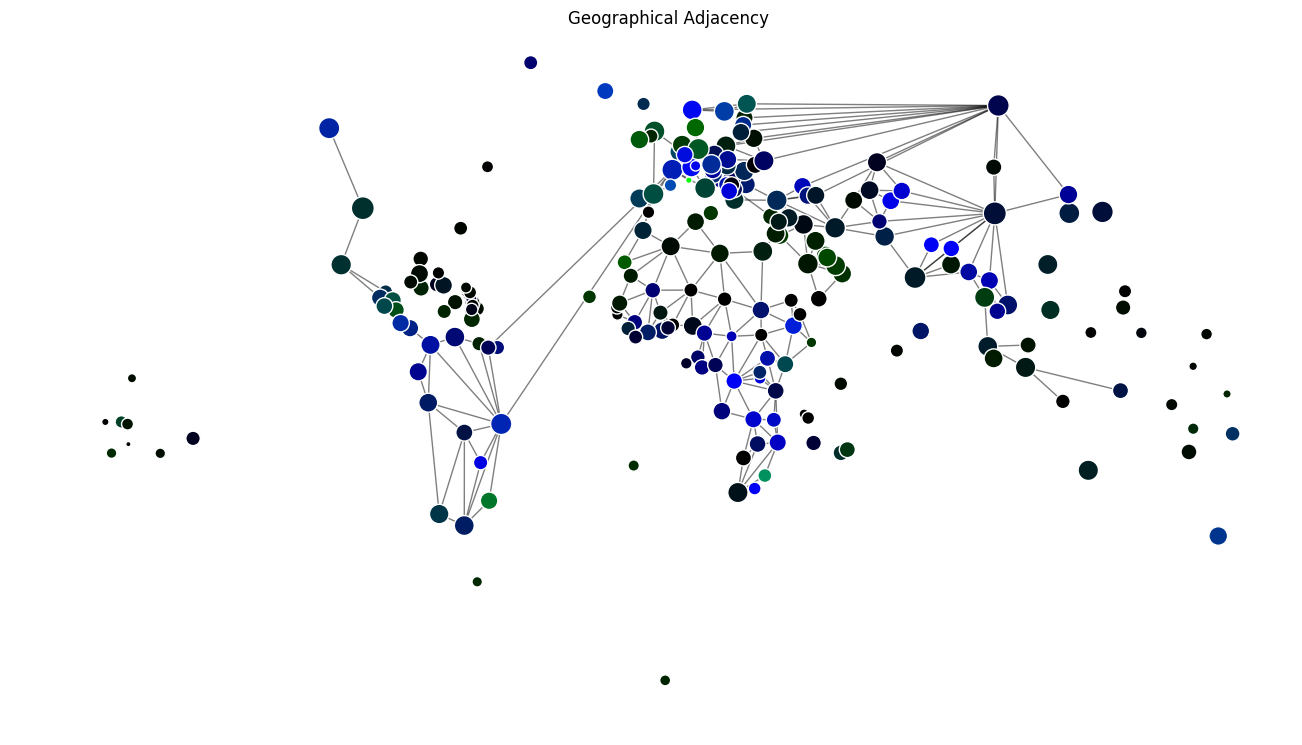

In [7]:
""" show the country graph - geography"""

G = nx.Graph()

G.add_nodes_from(nodes_list)
G.add_edges_from(geography_edges)

fig, ax = plt.subplots(figsize=(16,9 ), dpi=100)

for e in G.edges():
    if e[0] not in G.nodes():
        print e[0]
    if e[1] not in G.nodes():
        print e[1]

print G.nodes()
print G.edges()

pos = nx.get_node_attributes(G,'pos')

for k,v in pos.items():
    print k

print ('VA' in [k for k,v in pos.items()])

### Draw Edges
nx.draw_networkx_edges(G,
                               pos,
                               edgelist =G.edges(),
                               ax=ax,
                               edge_color=[v for k,v in nx.get_edge_attributes(G,'e_color').items()],
                               alpha=0.5
                              )
        
### Draw Nodes
nodes_ax = nx.draw_networkx_nodes(G,
                                          pos,
                                          ax=ax,
                                          nodelist=G.nodes(),
                                          node_size = [nx.get_node_attributes(G,'n_size')[n]*15 for n in G.nodes()],
                                          node_color = [nx.get_node_attributes(G,'n_color')[n] for n in G.nodes()],
                                          alpha= [nx.get_node_attributes(G,'n_alpha')[n] for n in G.nodes()]
                                          )
        
             

nodes_ax.set_edgecolor('w')


plt.axis('off')
plt.title('Geographical Adjacency')
fig.savefig('./figures/country_layer/geographic.png')
plt.show()

In [8]:
""" language edges """
import itertools as it

cols_dict = {
    'English':'red',
    'French':'blue',
    'Arabic':'purple',
    'Spanish':'yellow',
    'Portuguese':'orange',
    'German':'green'
}

hq_dict = {
    'English':'GB',
    'French':'FR',
    'Arabic':'EG', #capital of the Arab League is in Cairo
    'Spanish':'ES',
    'Portuguese':'PT',
    'German':'DE'
}


language_edges = []

df_language = pd.read_csv('languages.csv', encoding='utf-8', keep_default_na=False).set_index('iso2')
languages = list(df_language)
languages.remove('country')
languages.remove('iso3')
print languages

for l in languages:
    print l
    print df_language[df_language[l]=='TRUE'].index.values
    
    if l in cols_dict.keys():
        col = cols_dict[l]
        diaspora = list(df_language[df_language[l]=='TRUE'].index.values)
        diaspora.remove(hq_dict[l])
        #combinations = [(hq_dict[l],d) for d in diaspora]
        combinations = list(it.combinations(df_language[df_language[l]=='TRUE'].index.values,2))
    else:
        col='black'
        combinations = list(it.combinations(df_language[df_language[l]=='TRUE'].index.values,2))
    
    for c in combinations:
        if (c[0] in df_iso2.index.values) and (c[1] in df_iso2.index.values):
            language_edges.append(
                (c[0],c[1],{
                    'weight':1.0,
                    'type':'language',
                    'e_color':col,
                    'e_alpha':1.0
                })
            
            )


for e in language_edges:
    print e

print len(language_edges)

[u'Albanian', u'Aymara', u'Bengali', u'Berber', u'Greek', u'Guarani', u'Hausa', u'Korean', u'Romanian', u'Rwanda-Rundi', u'Sotho', u'Swati', u'Swedish', u'Tswana', u'Turkish', u'Cantonese', u'English', u'French', u'Arabic', u'Spanish', u'Portuguese', u'German', u'Serbo-Croatian', u'Italian', u'Malay based', u'Russian', u'Swahili', u'Chinese', u'Dutch', u'Hindustani', u'Persian', u'Tamil', u'Quechua']
Albanian
[u'AL' u'XK']
Aymara
[u'BO' u'PE']
Bengali
[u'BD' u'IN']
Berber
[u'DZ' u'MA']
Greek
[u'CY' u'GR']
Guarani
[u'BO' u'PY']
Hausa
[u'NE' u'NG']
Korean
[u'KP' u'KR']
Romanian
[u'MD' u'RO']
Rwanda-Rundi
[u'BI' u'RW']
Sotho
[u'LS' u'ZA']
Swati
[u'ZA' u'SZ']
Swedish
[u'FI' u'SE']
Tswana
[u'BW' u'ZA']
Turkish
[u'CY' u'TR']
Cantonese
[u'CN' u'HK' u'MO']
English
[u'AG' u'AU' u'BS' u'BB' u'BZ' u'BW' u'BI' u'CM' u'CA' u'CK' u'DM' u'FJ'
 u'GM' u'GH' u'GD' u'GY' u'IN' u'IE' u'JM' u'KE' u'KI' u'LS' u'LR' u'MW'
 u'MT' u'MH' u'MU' u'FM' u'NA' u'NR' u'NP' u'NZ' u'NG' u'NU' u'PK' u'PW'
 u'PG' u'PH' u

(u'LS', u'PK', {'e_color': 'red', 'e_alpha': 1.0, 'type': 'language', 'weight': 1.0})
(u'LS', u'PW', {'e_color': 'red', 'e_alpha': 1.0, 'type': 'language', 'weight': 1.0})
(u'LS', u'PG', {'e_color': 'red', 'e_alpha': 1.0, 'type': 'language', 'weight': 1.0})
(u'LS', u'PH', {'e_color': 'red', 'e_alpha': 1.0, 'type': 'language', 'weight': 1.0})
(u'LS', u'RW', {'e_color': 'red', 'e_alpha': 1.0, 'type': 'language', 'weight': 1.0})
(u'LS', u'KN', {'e_color': 'red', 'e_alpha': 1.0, 'type': 'language', 'weight': 1.0})
(u'LS', u'LC', {'e_color': 'red', 'e_alpha': 1.0, 'type': 'language', 'weight': 1.0})
(u'LS', u'VC', {'e_color': 'red', 'e_alpha': 1.0, 'type': 'language', 'weight': 1.0})
(u'LS', u'WS', {'e_color': 'red', 'e_alpha': 1.0, 'type': 'language', 'weight': 1.0})
(u'LS', u'SC', {'e_color': 'red', 'e_alpha': 1.0, 'type': 'language', 'weight': 1.0})
(u'LS', u'SL', {'e_color': 'red', 'e_alpha': 1.0, 'type': 'language', 'weight': 1.0})
(u'LS', u'SG', {'e_color': 'red', 'e_alpha': 1.0, 'typ

[u'BD', u'BE', u'BF', u'BG', u'BA', u'BB', u'WF', u'BM', u'BN', u'BO', u'BH', u'BI', u'BJ', u'BT', u'JM', u'BW', u'WS', u'BQ', u'BR', u'BS', u'BY', u'BZ', u'RU', u'RW', u'RS', u'TL', u'RE', u'TM', u'TJ', u'RO', u'TK', u'GW', u'GU', u'GT', u'GS', u'GR', u'GQ', u'GP', u'JP', u'GY', u'GF', u'GE', u'GD', u'GB', u'GA', u'GN', u'GM', u'GL', u'GI', u'GH', u'OM', u'TN', u'JO', u'HR', u'HT', u'HU', u'HN', u'VE', u'PS', u'PW', u'PT', u'KN', u'PY', u'IQ', u'PA', u'PF', u'PG', u'PE', u'PK', u'PH', u'PL', u'PM', u'ZM', u'EH', u'EE', u'EG', u'ZA', u'EC', u'IT', u'VN', u'SB', u'ET', u'ZW', u'SA', u'ES', u'ER', u'ME', u'MD', u'MG', u'MF', u'MA', u'MC', u'UZ', u'MM', u'ML', u'MN', u'MH', u'MK', u'MU', u'MT', u'MW', u'MV', u'MQ', u'MP', u'MS', u'MR', u'IM', u'UG', u'MY', u'MX', u'IL', u'FR', u'SH', u'FI', u'FJ', u'FK', u'FM', u'FO', u'NI', u'NL', u'NO', u'SO', u'VU', u'NC', u'NE', u'NG', u'NZ', u'NP', u'NR', u'NU', u'CK', u'XK', u'CI', u'CH', u'CO', u'CN', u'CM', u'CL', u'CA', u'CG', u'CF', u'CD', u'CZ'

False


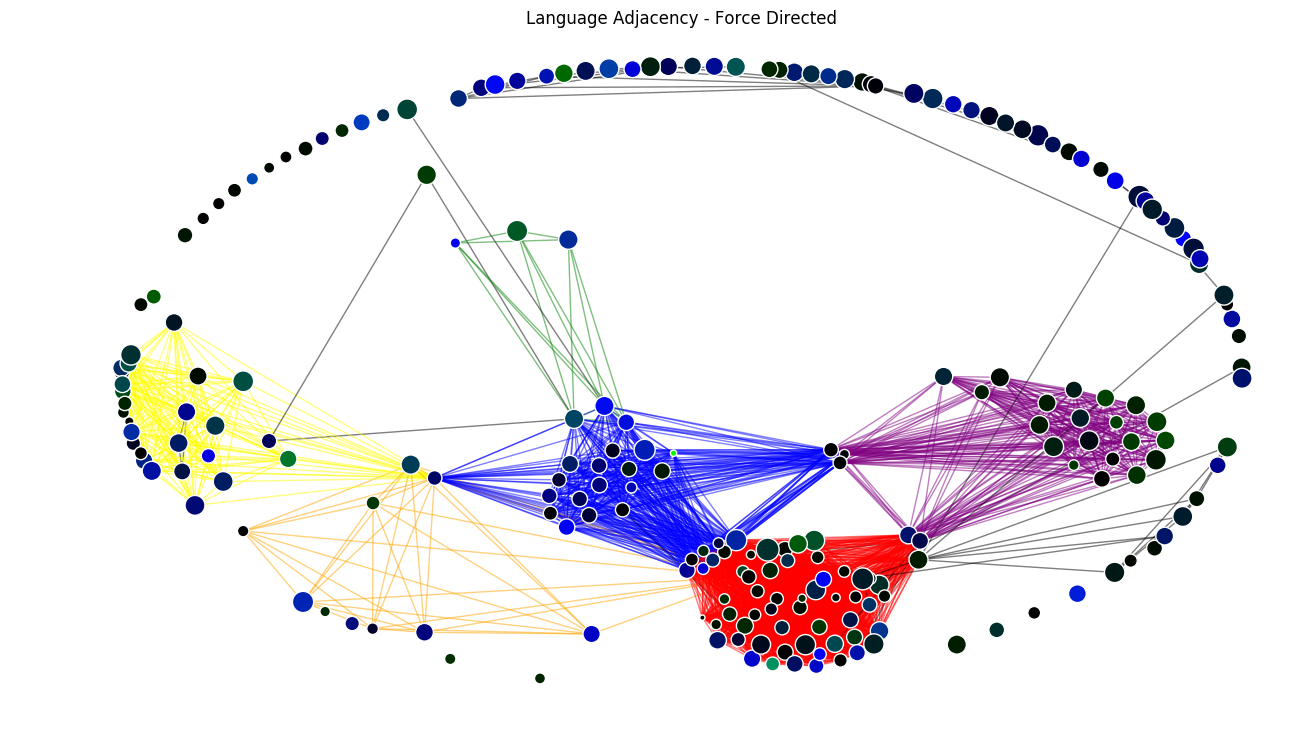

In [10]:
""" show the country graph - language"""

G = nx.Graph()

G.add_nodes_from(nodes_list)
G.add_edges_from(language_edges)

fig, ax = plt.subplots(figsize=(16,9 ), dpi=100)

for e in G.edges():
    if e[0] not in G.nodes():
        print e[0]
    if e[1] not in G.nodes():
        print e[1]

print G.nodes()
print G.edges()

print nx.get_edge_attributes(G,'e_color')

pos = nx.get_node_attributes(G,'pos')

pos = nx.spring_layout(G, k=4000, iterations=1000, pos=pos, center=[0,0], weight='weight')#fixed=fixed_nodes, 
        

#for k,v in pos.items():
#    print k

print ('VA' in [k for k,v in pos.items()])


### Draw Edges
nx.draw_networkx_edges(G,
                               pos,
                               edgelist =G.edges(),
                               ax=ax,
                               edge_color=[nx.get_edge_attributes(G,'e_color')[e] for e in G.edges()],
                               alpha=0.5
                              )
        
### Draw Nodes
nodes_ax = nx.draw_networkx_nodes(G,
                                          pos,
                                          ax=ax,
                                          nodelist=G.nodes(),
                                          node_size = [nx.get_node_attributes(G,'n_size')[n]*15 for n in G.nodes()],
                                          node_color = [nx.get_node_attributes(G,'n_color')[n] for n in G.nodes()],
                                          alpha= [nx.get_node_attributes(G,'n_alpha')[n] for n in G.nodes()]
                                          )
        
             

nodes_ax.set_edgecolor('w')


plt.axis('off')
plt.title('Language Adjacency - Force Directed')
fig.savefig('./figures/country_layer/language_spring.png')
plt.show()

In [36]:
""" language edges - shortest """
#need to find the shortest total path such that all connect - 

from vincenty import *

print pos

cols_dict = {
    'English':'red',
    'French':'blue',
    'Arabic':'purple',
    'Spanish':'yellow',
    'Portuguese':'orange',
    'German':'green'
}

cols_dict_inv = {
    'red':'English',
    'blue':'French',
    'purple':'Arabic',
    'yellow':'Spanish',
    'orange':'Portuguese',
    'green':'German'
}

hq_dict = {
    'English':'GB',
    'French':'FR',
    'Arabic':'EG', #capital of the Arab League is in Cairo
    'Spanish':'ES',
    'Portuguese':'PT',
    'German':'DE'
}


language_single_edges = []

df_language = pd.read_csv('languages.csv', encoding='utf-8', keep_default_na=False).set_index('iso2')
languages = list(df_language)
languages.remove('country')
languages.remove('iso3')
print languages



for l in languages:
    print l
    print df_language[df_language[l]=='TRUE'].index.values
    
    if l in cols_dict.keys():
        col = cols_dict[l]
        diaspora = list(df_language[df_language[l]=='TRUE'].index.values)
        diaspora.remove(hq_dict[l])
        #combinations = [(hq_dict[l],d) for d in diaspora]
        combinations = list(it.combinations(df_language[df_language[l]=='TRUE'].index.values,2))
    else:
        col='black'
        combinations = list(it.combinations(df_language[df_language[l]=='TRUE'].index.values,2))
    
    for c in combinations:
        if (c[0] in df_iso2.index.values) and (c[1] in df_iso2.index.values):
            
            pt1 = pos[c[0]]
            pt2 = pos[c[1]]
            
            language_single_edges.append(
                (c[0],c[1],{
                    'weight':1.0,
                    'type':'language',
                    'e_color':col,
                    'dist': V_inv(pt1,pt2),
                    'e_alpha':1.0
                })
            
            )
            
print language_single_edges

primaries =set([e[0] for e in language_single_edges])

language_edges_out = []


for p in primaries:
    for l in languages:
        subgroup = [e for e in language_single_edges if (e[0]==p) and (e[2]['e_color']==l)]
        subgroup = sorted(subgroup, key=lambda x: x[2]['dist'][0])
        print subgroup
#print 'primaries', set(primaries)

#for e in language_single_edges:
#    print e



{u'BD': array([ 90.356331,  23.684994]), u'BE': array([  4.469936,  50.503887]), u'BF': array([ -1.561593,  12.238333]), u'BG': array([ 25.48583 ,  42.733883]), u'BA': array([ 17.679076,  43.915886]), u'BB': array([-59.543198,  13.193887]), u'WF': array([-177.156097,  -13.768752]), u'BM': array([-64.75737 ,  32.321384]), u'BN': array([ 114.727669,    4.535277]), u'BO': array([-63.588653, -16.290154]), u'BH': array([ 50.637772,  25.930414]), u'BI': array([ 29.918886,  -3.373056]), u'BJ': array([ 2.315834,  9.30769 ]), u'BT': array([ 90.433601,  27.514162]), u'JM': array([-77.297508,  18.109581]), u'BW': array([ 24.684866, -22.328474]), u'WS': array([-172.104629,  -13.759029]), u'BQ': array([-66.512552,  14.737753]), u'BR': array([-51.92528 , -14.235004]), u'BS': array([-77.39628,  25.03428]), u'BY': array([ 27.953389,  53.709807]), u'BZ': array([-88.49765 ,  17.189877]), u'RU': array([ 105.318756,   61.52401 ]), u'RW': array([ 29.873888,  -1.940278]), u'RS': array([ 21.005859,  44.01652

KeyError: u'Albanian'

In [16]:
V_inv((10.0,0),(11.0,0))

(110.611187, 0.0, 0.0)

In [18]:
V_dir((10.0,0.0),110000,0.0)

((10.994474634938591, 0.0), 0.0)